In [1]:
import pandas as pd

Aplique seus conhecimentos para tentar responder questões importantes, como por exemplo:

Qual mês teve o maior YoY? Por quê? (descarte meses com poucas amostras); <br>
Organize uma tabela de pagamentos fazendo com que o primeiro pagamento de cada pedido seja sempre o maior valor (use métodos de rank com Groupby para isso);<br>
Descarte outliers de valores de pedidos acima do percentil 95 e mostre o histograma dos pagamentos;<br>
Divida as datas dos pedidos em trimestres (Q1 até Q4) e crie uma tabela cruzada dos valores médios, mediana, soma e contagem dos produtos de diferentes categorias com os rótulos dos trimestres. Qual trimestre é mais forte para cada categoria? Explique.

In [17]:
df1 = pd.read_csv('data/olist_order_items_dataset.csv')
df2 = pd.read_csv('data/olist_products_dataset.csv')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
#alterando o tipo do shipping_limit_date  
df1["shipping_limit_date"] = pd.to_datetime(df1["shipping_limit_date"])

In [31]:
# criando as variáveis ano e mês
df1["ano"] = df1["shipping_limit_date"].dt.year
df1["mes"] = df1["shipping_limit_date"].dt.month

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
 7   ano                  112650 non-null  int32         
 8   mes                  112650 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 6.9+ MB


In [33]:
df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,ano,mes
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018,5
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018,7
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017,10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017,8


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,ano,mes
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018,5
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018,7
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017,10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017,8


1 - Qual mês teve o maior YoY? Por quê? (descarte meses com poucas amostras); 

In [36]:
df1_mes_ano = (
    df1.groupby(['ano', 'mes'])
       .agg(
           pedidos = ('order_id', 'nunique'),
           vendas = ('price', 'sum')
       )
)
df1_mes_ano

pedidos      vendas
ano  mes                     
2016 9          2      194.47
     10       309    49580.55
     12         1       10.90
2017 1        573    80124.74
     2       1650   245982.01
     3       2401   343242.60
     4       2111   308148.32
     5       3674   505655.46
     6       3385   469001.05
     7       3643   465282.10
     8       4403   560093.34
     9       4165   617046.12
     10      4490   658020.23
     11      6314   883351.63
     12      6772   898920.98
2018 1       6656   845279.18
     2       6450   819228.85
     3       7636  1030527.84
     4       6656   958729.70
     5       7572  1084358.55
     6       6019   870736.84
     7       5922   811132.08
     8       7823  1072147.70
     9         82    14502.50
2020 2          2      145.98
     4          1      199.98

In [37]:
df1_mes_ano.pedidos.describe()

count      26.000000
mean     3796.615385
std      2812.824617
min         1.000000
25%       842.250000
50%      3919.500000
75%      6416.000000
max      7823.000000
Name: pedidos, dtype: float64

In [38]:
df1_pedidos_filtrados = df1_mes_ano[
    df1_mes_ano['pedidos'] > 1000
    ]

In [39]:
df1_pedidos_filtrados

pedidos      vendas
ano  mes                     
2017 2       1650   245982.01
     3       2401   343242.60
     4       2111   308148.32
     5       3674   505655.46
     6       3385   469001.05
     7       3643   465282.10
     8       4403   560093.34
     9       4165   617046.12
     10      4490   658020.23
     11      6314   883351.63
     12      6772   898920.98
2018 1       6656   845279.18
     2       6450   819228.85
     3       7636  1030527.84
     4       6656   958729.70
     5       7572  1084358.55
     6       6019   870736.84
     7       5922   811132.08
     8       7823  1072147.70

In [42]:
df1_pedidos_filtrados["pedidos_yoy"] = (
    df1_pedidos_filtrados['pedidos']
    .pct_change(12)
)
df1_pedidos_filtrados['vendas_yoy'] = (
    df1_pedidos_filtrados['vendas']
    .pct_change(12)
)

C:\Users\mroch\AppData\Local\Temp\ipykernel_9468\179007992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_pedidos_filtrados["pedidos_yoy"] = (
C:\Users\mroch\AppData\Local\Temp\ipykernel_9468\179007992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_pedidos_filtrados['vendas_yoy'] = (


In [43]:
df1_pedidos_filtrados

pedidos      vendas  pedidos_yoy  vendas_yoy
ano  mes                                              
2017 2       1650   245982.01          NaN         NaN
     3       2401   343242.60          NaN         NaN
     4       2111   308148.32          NaN         NaN
     5       3674   505655.46          NaN         NaN
     6       3385   469001.05          NaN         NaN
     7       3643   465282.10          NaN         NaN
     8       4403   560093.34          NaN         NaN
     9       4165   617046.12          NaN         NaN
     10      4490   658020.23          NaN         NaN
     11      6314   883351.63          NaN         NaN
     12      6772   898920.98          NaN         NaN
2018 1       6656   845279.18          NaN         NaN
     2       6450   819228.85     2.909091    2.330442
     3       7636  1030527.84     2.180342    2.002331
     4       6656   958729.70     2.153008    2.111261
     5       7572  1084358.55     1.060969    1.144461
     6       6019   870736.84     0.778139    0.856578
     7       5922   811132.08     0.625583    0.743312
     8       7823  1072147.70     0.776743    0.914230

2 - Organize uma tabela de pagamentos fazendo com que o primeiro pagamento de cada pedido seja sempre o maior valor (use métodos de rank com Groupby para isso);

In [44]:
df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,ano,mes
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018,5
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018,7
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017,10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017,8


In [49]:
df1_organizado_por_pedido = (
    df1[["order_id", "order_item_id", "price"]]
    .copy()
)
df1_organizado_por_pedido['rank'] = (
    df1_organizado_por_pedido
    .groupby("order_id")["price"]
    .rank(ascending=True)
)
df1_organizado_por_pedido = (
    df1_organizado_por_pedido
    .sort_values(["order_id", "rank"])
)

In [50]:
df1_organizado_por_pedido

,order_id,order_item_id,price,rank
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,1.0
2,000229ec398224ef6ca0657da4fc703e,1,199.00,1.0
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,1.0
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,299.99,1.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,350.00,1.0
112647,fffce4705a9662cd70adb13d4a31832d,1,99.90,1.0
112648,fffe18544ffabc95dfada21779c9644f,1,55.99,1.0


In [51]:
df1_organizado_por_pedido[df1_organizado_por_pedido["rank"] > 1].head()

,order_id,order_item_id,price,rank
13,0008288aa423d2a3f00fcb17cd7d8719,1,49.90,1.5
14,0008288aa423d2a3f00fcb17cd7d8719,2,49.90,1.5
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,21.33,2.0
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,21.33,2.0
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,21.33,2.0


In [52]:
df1_organizado_por_pedido[df1_organizado_por_pedido["order_id"] == "0008288aa423d2a3f00fcb17cd7d8719"]

,order_id,order_item_id,price,rank
13,0008288aa423d2a3f00fcb17cd7d8719,1,49.9,1.5
14,0008288aa423d2a3f00fcb17cd7d8719,2,49.9,1.5


In [53]:
df1_organizado_por_pedido[df1_organizado_por_pedido["order_id"] == "00143d0f86d6fbd9f9b38ab440ac16f5"]

,order_id,order_item_id,price,rank
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,21.33,2.0
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,21.33,2.0
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,21.33,2.0


3 - Descarte outliers de valores de pedidos acima do percentil 95 e mostre o histograma dos pagamentos;

In [54]:
df_histograma_pedidos = df1.copy()
df_histograma_pedidos["ok"] = pd.qcut(
    df_histograma_pedidos["price"], 
    q=[0, 0.95, 1], 
    labels=["ok", "nok"]
)

In [55]:
df_histograma_pedidos

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,ano,mes,ok
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9,ok
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5,ok
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1,ok
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8,ok
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2,ok
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018,5,ok
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018,7,nok
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017,10,ok
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017,8,ok


In [56]:
df_histograma_pedidos_filtrado = df_histograma_pedidos[
    df_histograma_pedidos["ok"] == "ok"
]

<Axes: >

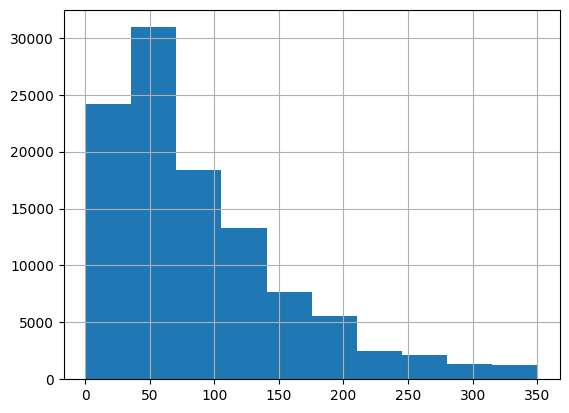

In [58]:
df_histograma_pedidos_filtrado["price"].hist()

4 - Divida as datas dos pedidos em trimestres (Q1 até Q4) e crie uma tabela cruzada dos valores médios, mediana, soma e contagem dos produtos de diferentes categorias com os rótulos dos trimestres. Qual trimestre é mais forte para cada categoria? Explique.

In [59]:
df_orders_products_merge = pd.merge(
    df1[["order_id", "ano", "mes", "product_id", "price"]],
    df2[["product_id", "product_category_name"]],
    on="product_id"
)

In [60]:
df_orders_products_merge

,order_id,ano,mes,product_id,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,2017,9,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
1,130898c0987d1801452a8ed92a670612,2017,7,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,2018,5,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,2017,8,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,2017,8,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,2018,7,4cc4d02efc8f249c13355147fb44e34d,129.9,ferramentas_jardim
112646,ffee31fb4b5e35c9123608015637c495,2018,8,b10ecf8e33aaaea419a9fa860ea80fb5,99.0,moveis_decoracao
112647,fff7c4452f050315db1b3f24d9df5fcd,2017,6,dd469c03ad67e201bc2179ef077dcd48,736.0,relogios_presentes
112648,fffa82886406ccf10c7b4e35c4ff2788,2017,12,bbe7651fef80287a816ead73f065fc4b,229.9,esporte_lazer


In [61]:
df_orders_products_merge["trimestre"] = (
    df_orders_products_merge["mes"]
    .replace({
        1:"T1",
        2:"T1",
        3:"T1",
        4:"T2",
        5:"T2",
        6:"T2",
        7:"T3",
        8:"T3",
        9:"T3",
        10:"T4",
        11:"T4",
        12:"T4"
    })
)

In [62]:
df_orders_products_merge

,order_id,ano,mes,product_id,price,product_category_name,trimestre
0,00010242fe8c5a6d1ba2dd792cb16214,2017,9,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,T3
1,130898c0987d1801452a8ed92a670612,2017,7,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,T3
2,532ed5e14e24ae1f0d735b91524b98b9,2018,5,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff,T2
3,6f8c31653edb8c83e1a739408b5ff750,2017,8,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,T3
4,7d19f4ef4d04461989632411b7e588b9,2017,8,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,T3
...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,2018,7,4cc4d02efc8f249c13355147fb44e34d,129.9,ferramentas_jardim,T3
112646,ffee31fb4b5e35c9123608015637c495,2018,8,b10ecf8e33aaaea419a9fa860ea80fb5,99.0,moveis_decoracao,T3
112647,fff7c4452f050315db1b3f24d9df5fcd,2017,6,dd469c03ad67e201bc2179ef077dcd48,736.0,relogios_presentes,T2
112648,fffa82886406ccf10c7b4e35c4ff2788,2017,12,bbe7651fef80287a816ead73f065fc4b,229.9,esporte_lazer,T4


In [63]:
pd.cut(
    df_orders_products_merge["mes"],
    [0, 3, 6, 9, 12],
    labels=["T1", "T2", "T3", "T4"]
)

0         T3
1         T3
2         T2
3         T3
4         T3
          ..
112645    T3
112646    T3
112647    T2
112648    T4
112649    T2
Name: mes, Length: 112650, dtype: category
Categories (4, object): ['T1' < 'T2' < 'T3' < 'T4']

In [64]:
df_pedidos_trimestre_categoria = (
    df_orders_products_merge
    .groupby(["trimestre", "product_category_name"])
    .agg(
        pedidos = ("order_id", "nunique"),
        venda_media = ("price", "mean"),
        venda_mediana = ("price", "median"),
        venda_total = ("price", "sum")
    )
    .reset_index()
)

In [65]:
df_pedidos_trimestre_categoria["rank_pedidos"] = (
    df_pedidos_trimestre_categoria
    .groupby("product_category_name")
    ["pedidos"]
    .rank(ascending=False, method="min")
)

df_pedidos_trimestre_categoria["rank_vendas"] = (
    df_pedidos_trimestre_categoria
    .groupby("product_category_name")
    ["venda_total"]
    .rank(ascending=False, method="min")
)

In [66]:
df_pedidos_trimestre_categoria[
    df_pedidos_trimestre_categoria["rank_pedidos"] == 1
][["product_category_name", "trimestre"]].sort_values("product_category_name")

,product_category_name,trimestre
0,agro_industria_e_comercio,T1
143,alimentos,T3
217,alimentos_bebidas,T4
73,artes,T2
146,artes_e_artesanato,T3
...,...,...
137,sinalizacao_e_seguranca,T2
66,tablets_impressao_imagem,T1
139,telefonia,T2
68,telefonia_fixa,T1


In [67]:
df_pedidos_trimestre_categoria[
    df_pedidos_trimestre_categoria["rank_vendas"] == 1
][["product_category_name", "trimestre"]].sort_values("product_category_name")

,product_category_name,trimestre
215,agro_industria_e_comercio,T4
143,alimentos,T3
217,alimentos_bebidas,T4
73,artes,T2
146,artes_e_artesanato,T3
...,...,...
137,sinalizacao_e_seguranca,T2
138,tablets_impressao_imagem,T2
212,telefonia,T3
281,telefonia_fixa,T4
